<a href="https://colab.research.google.com/github/amilsiddik/percobaan/blob/main/SHIBA_USD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [5]:
!pip install kaggle -q kaggle

In [6]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amilsiddik","key":"b43971799bfdd2e36e5859e90b477279"}'}

In [8]:
!mkdir ~/.kaggle

In [9]:
!cp kaggle.json ~/.kaggle

In [10]:
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle datasets list -s "SHIB-USD"

ref                                         title                          size  lastUpdated          downloadCount  
------------------------------------------  -----------------------------  ----  -------------------  -------------  
varpit94/shiba-inu-data                     SHIBA INU Data                  2KB  2021-10-30 17:17:15            431  
deepcontractor/shiba-token-historical-data  Shiba Token | Historical Data   7KB  2021-10-11 14:25:26             96  


In [15]:
!kaggle datasets download -d varpit94/shiba-inu-data

  0% 0.00/2.17k [00:00<?, ?B/s]
100% 2.17k/2.17k [00:00<00:00, 1.90MB/s]


In [16]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

df = pd.read_csv('SHIB-USD.csv' ,parse_dates=['Date'],infer_datetime_format=True)

In [19]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-05-19,0.000016,0.000016,0.000006,0.000009,0.000009,3271067996
1,2021-05-20,0.000009,0.000012,0.000008,0.000010,0.000010,2507945867
2,2021-05-21,0.000010,0.000010,0.000007,0.000008,0.000008,1547207565
3,2021-05-22,0.000008,0.000010,0.000007,0.000008,0.000008,1229821215
4,2021-05-23,0.000008,0.000010,0.000007,0.000008,0.000008,1585032040


In [20]:
df.shape

(165, 7)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       165 non-null    datetime64[ns]
 1   Open       165 non-null    float64       
 2   High       165 non-null    float64       
 3   Low        165 non-null    float64       
 4   Close      165 non-null    float64       
 5   Adj Close  165 non-null    float64       
 6   Volume     165 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 9.1 KB


In [22]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,165.000000,165.000000,165.000000,165.000000,165.000000,1.650000e+02
mean,0.000012,0.000013,0.000011,0.000012,0.000012,1.921159e+09
std,0.000012,0.000014,0.000010,0.000012,0.000012,4.838933e+09
min,0.000006,0.000006,0.000005,0.000006,0.000006,1.841112e+08
25%,0.000007,0.000007,0.000007,0.000007,0.000007,3.127893e+08
50%,0.000008,0.000008,0.000007,0.000008,0.000008,4.723039e+08
75%,0.000009,0.000010,0.000008,0.000009,0.000009,9.864033e+08
max,0.000079,0.000088,0.000068,0.000080,0.000080,3.905385e+10


In [23]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

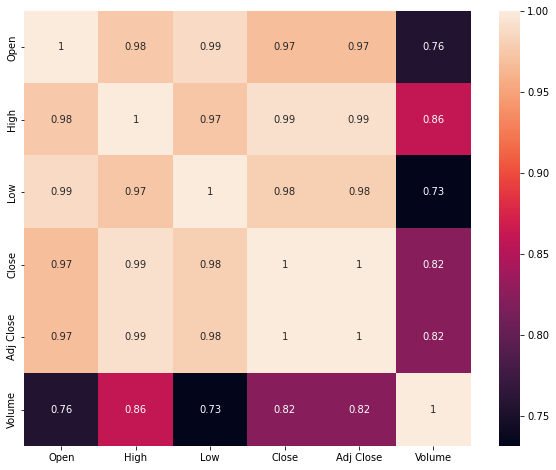

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

dari heatmap di atas terlihat adj close dan close memiliki corelasi yg sama

In [25]:
df['Close'].duplicated().any()

True

In [26]:
df.drop('Adj Close',axis=1, inplace = True)

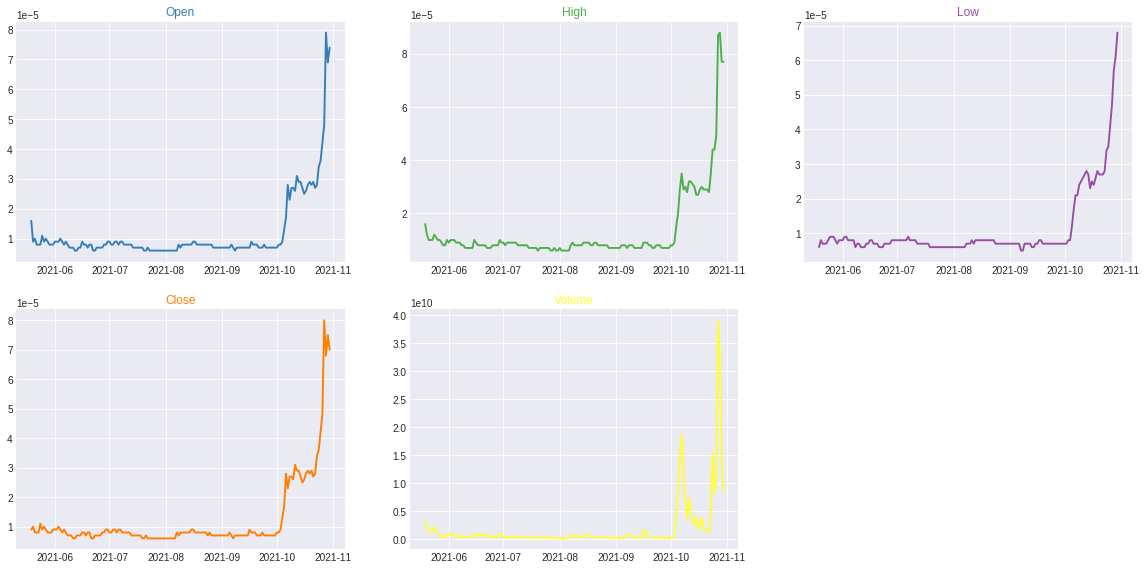

In [27]:
# Initialize the figure style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
# multiple line plot
plt.figure(figsize=(20,15))
num=0
for column in df.drop('Date', axis=1):
    num+=1
    #plt.figure(figsize=(20,10))
    # Find the right spot on the plot
    plt.subplot(3,3, num)
 
    # Plot the lineplot
    plt.plot(df['Date'], df[column], marker='', color=palette(num), linewidth=1.9, label=column)
 

 
    # Not ticks everywhere
    if num in range(7) :
        plt.tick_params(labelbottom='off')
    if num not in [1,4,7] :
        plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='center', fontsize=12, fontweight=0, color=palette(num) )


Regresi Linear

In [28]:
X = df[[ 'Open', 'High', 'Low','Volume']]
y = df['Close']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
from sklearn.preprocessing import StandardScaler
#Initalise standard scaler
scaler = StandardScaler()
#Fit the scaler using X_train data
scaler.fit(X_train)
#Transform X_train and X_test using the scaler and convert back to DataFrame
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [31]:
#Import Library
from sklearn.linear_model import LinearRegression

#Initialise & Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

#Use Model to Make Predictions
y_pred = model.predict(X_test)

#Get Intercept & Coefficients
print(model.intercept_)
coef = pd.DataFrame(model.coef_, X_train.columns, columns=['Coef'])

#Get MSE & MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

1.0469565217391306e-05
MSE: 1.4400603577024688e-12
MAE: 7.473771236161938e-07
